In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()

In [43]:
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

In [115]:
degrees = [2, 2, 10, 30, 50, 50, 70, 120, 120, 50]

In [116]:
Graphs = []

In [117]:
for i in range(10):
    Graphs.append(nx.read_gexf(f"./graph_201{i}.gexf"))

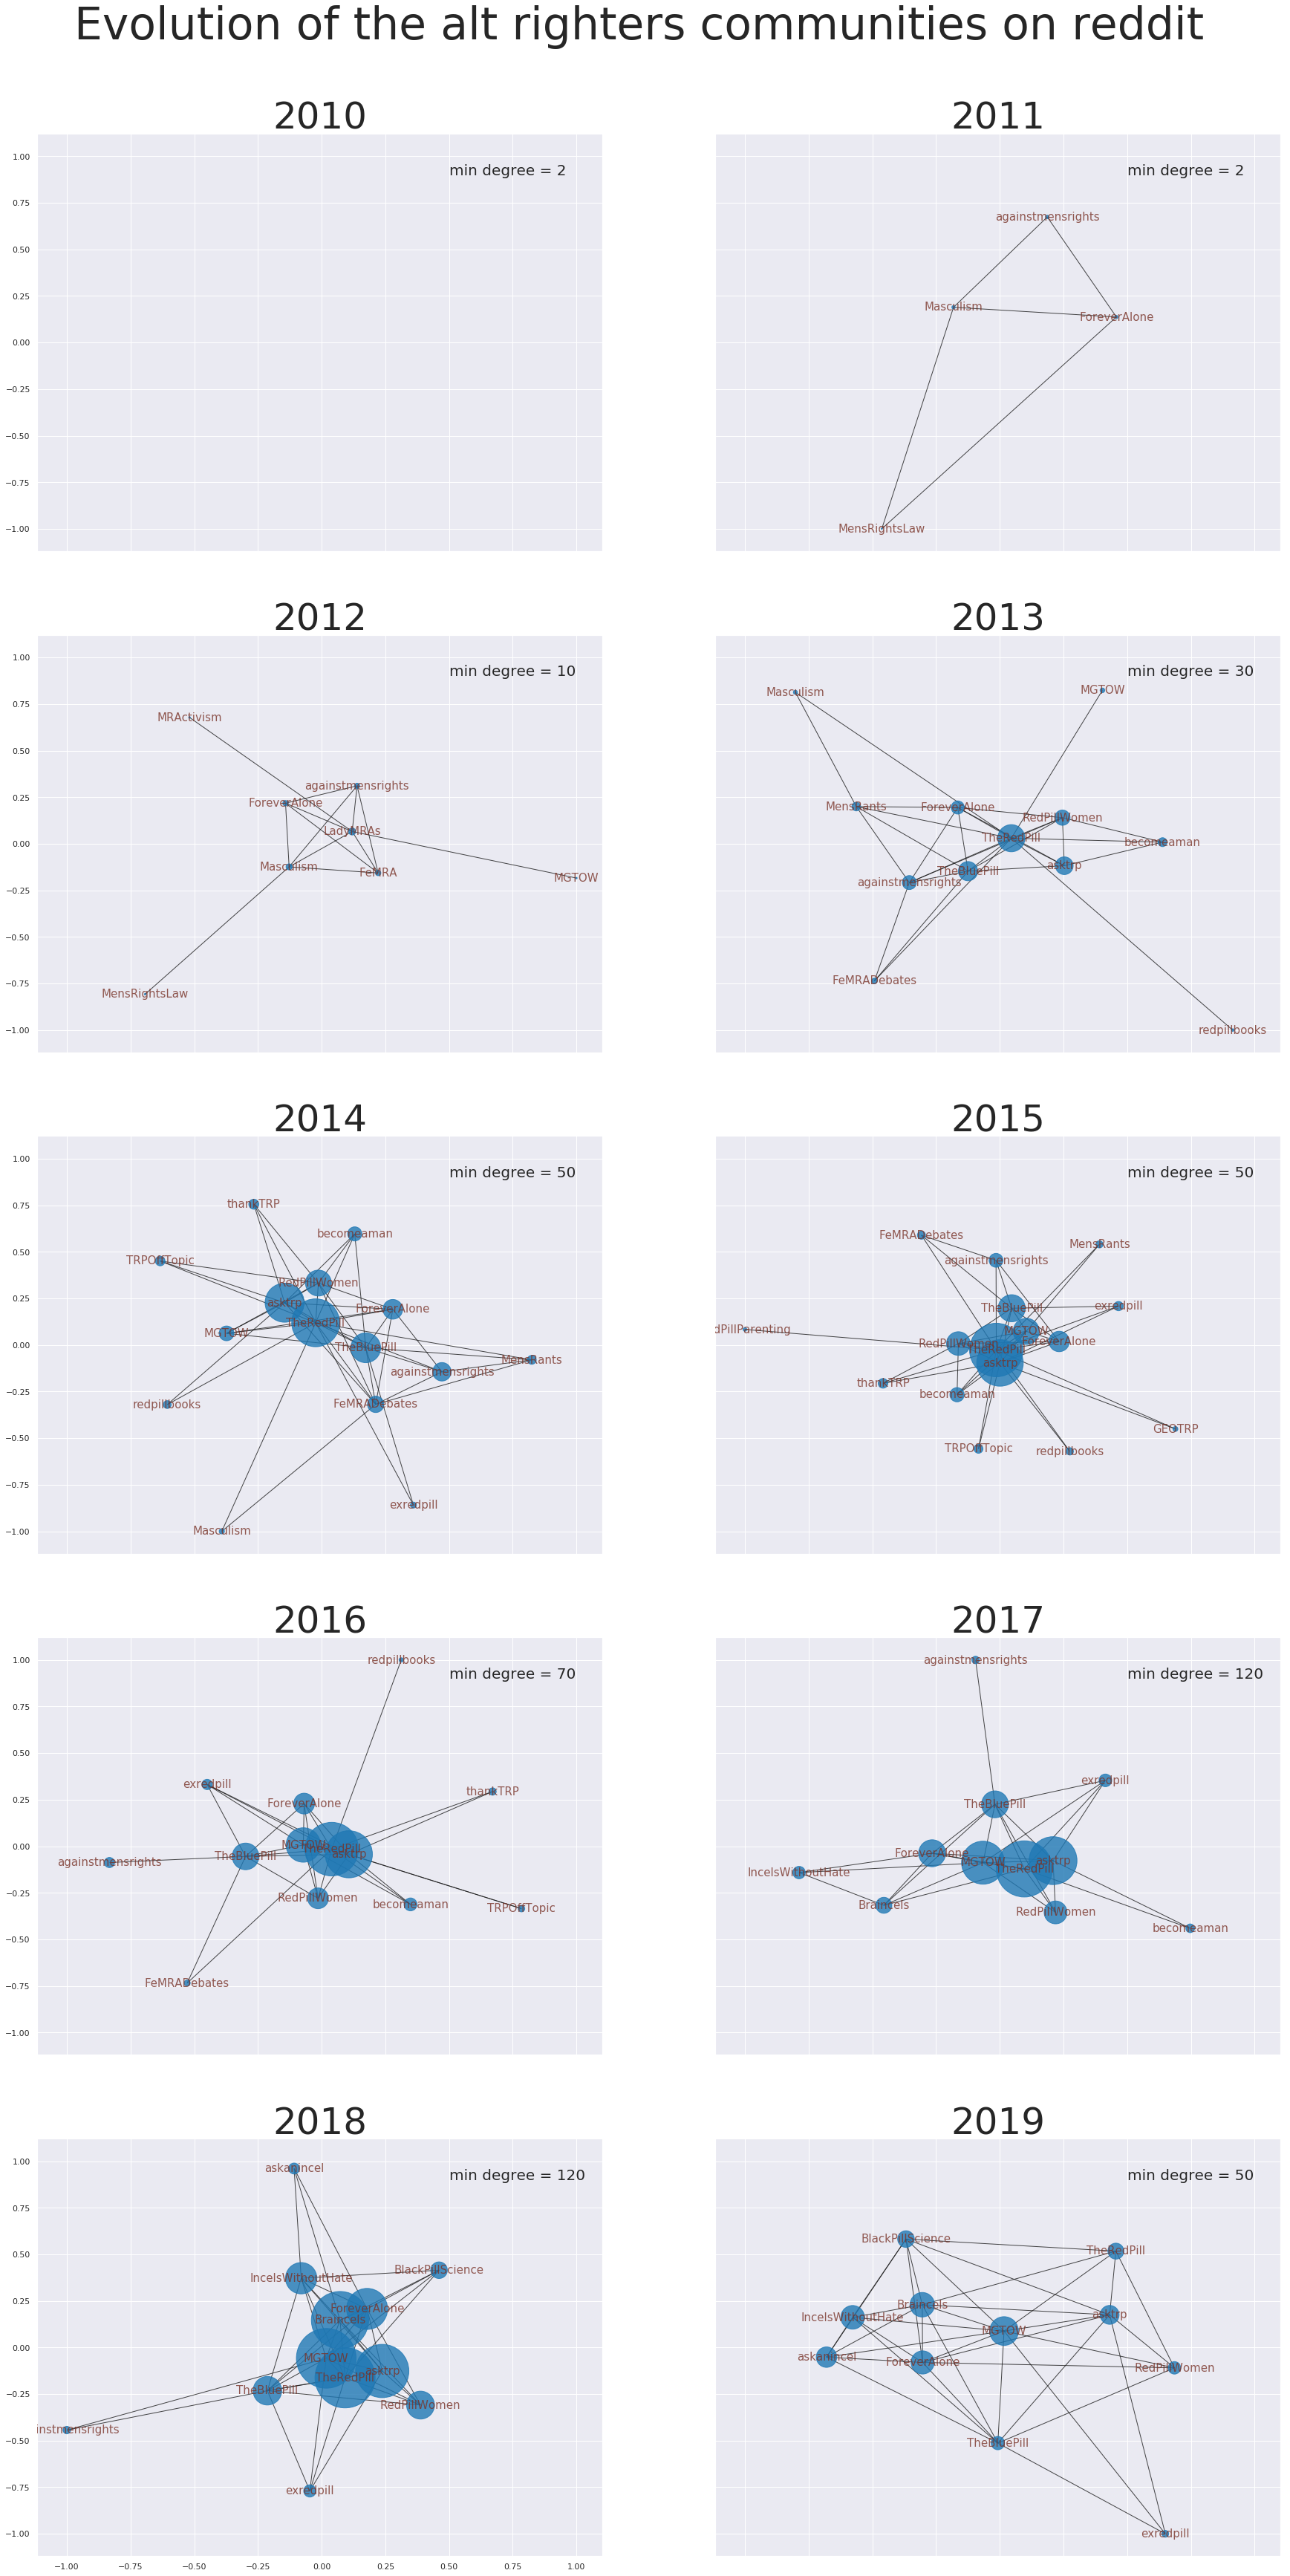

In [118]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 60), sharey=True, sharex=True);
fig.suptitle('Evolution of the alt righters communities on reddit', fontsize=60, y=0.92)
for i in range(10):

    c = int(i/2)
        
    t = []
    e_size = []
    for (u,v,d) in Graphs[i].edges(data='weight'):
        if d < degrees[i]:
            t.append([u, v])
            e_size.append(d)
            
    Graphs[i].remove_edges_from(t)
    
    size = []
    
    no_degree = []
    
    for node in Graphs[i].nodes:
        if Graphs[i].degree(node, weight='weight') < degrees[i]:
            no_degree.append(node)
        else:
            size.append(Graphs[i].degree(node, weight='weight'))
    
    Graphs[i].remove_nodes_from(no_degree)
    
    axs[c, i%2].set_title(years[i], fontsize=50)
    axs[c, i%2].text(y = 0.9, x=0.5, s=f'min degree = {degrees[i]}', fontsize=20)
        
    nx.draw_networkx(Graphs[i], with_labels=True, font_color='#783227', node_size=np.array(size)*0.4,
        alpha = 0.8, font_size=15, ax=axs[c, i%2])
    
    #nx.write_gexf(Graphs[i], f'reddits_graph_{year}.gexf')
